In [8]:
import pandas as pd
from decimal import Decimal

from math import ceil

## 1. Calculate TWR for a given f

In [11]:
def calculate_twr(trades: list, f: Decimal):
    
    starting_value = Decimal(ceil(abs(min(trades)) / f))
    working_values = [starting_value]
        
    for trade in trades:
        prev_working = working_values[-1]
        current_working = ( (prev_working / starting_value) * trade ) + prev_working
        working_values.append(current_working)
        
    return working_values[-1] / starting_value


trades = [Decimal(x) for x in [
    100, -500, 1500, -600
]]

f = Decimal(0.01)
print(f'f = {f:.2f}; TWR = {calculate_twr(trades, f):.8f}')

f = Decimal(0.02)
print(f'f = {f:.2f}; TWR = {calculate_twr(trades, f):.8f}')


f = 0.01; TWR = 1.00797091
f = 0.02; TWR = 1.01522283


## 2. Perform test for range of f values

In [15]:
test_result = {}

for f in range(1, 100):
    f = Decimal(f / 100)
    
    test_result[f] = calculate_twr(trades, f)

# test_result

Optimal F / TWR


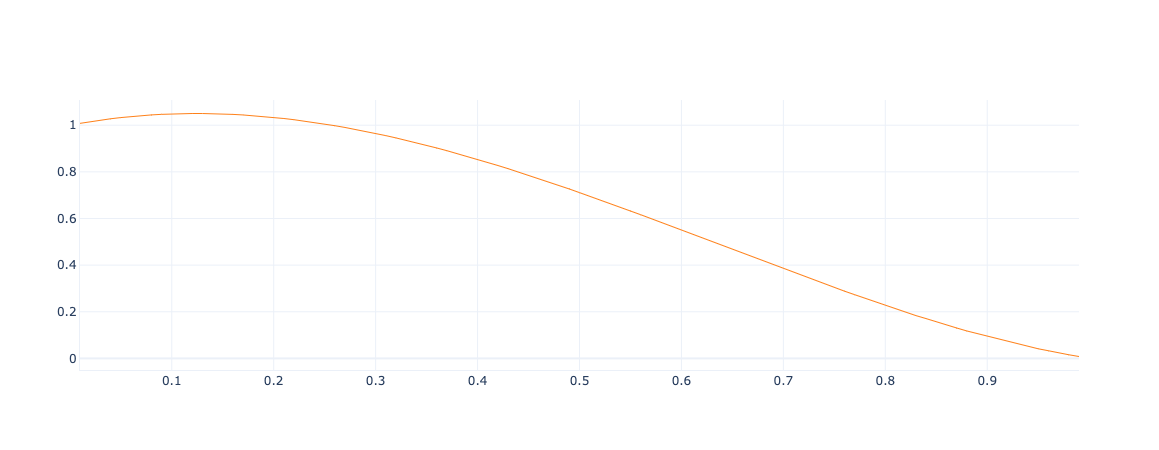

In [21]:
import plotly.graph_objects as go

result_graph = go.Figure(data=[
    go.Scatter(
        name='Optimal F / TWR', x=list(test_result.keys()), y=list(test_result.values()), line=dict(color='#fe8019', width=1)
    ),
])
result_graph.update_layout(template='plotly_white')

print('Optimal F / TWR')
result_graph.show()

## 3. Find the optimal f

In [20]:
max_twr = float('-inf')
optimal_f = -1

for _f, twr in test_result.items():
    if twr > max_twr:
        max_twr = twr
        optimal_f = _f
        
print(f'Optimal f = {optimal_f:.2f}; max(TWR) = {max_twr:.8f}')

Optimal f = 0.12; max(TWR) = 1.05019139
